In [2]:
import warnings
warnings.filterwarnings('ignore')

# import lightgbm as lgb
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
#import timeit
import xgboost as xgb

from pandas.plotting import scatter_matrix
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import ElasticNet, Lasso, LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

sns.set()
%matplotlib inline

In [4]:
df=pd.read_csv("Advertisement.csv")

In [5]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [6]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [7]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [8]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [10]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [12]:
df.duplicated().sum()

0

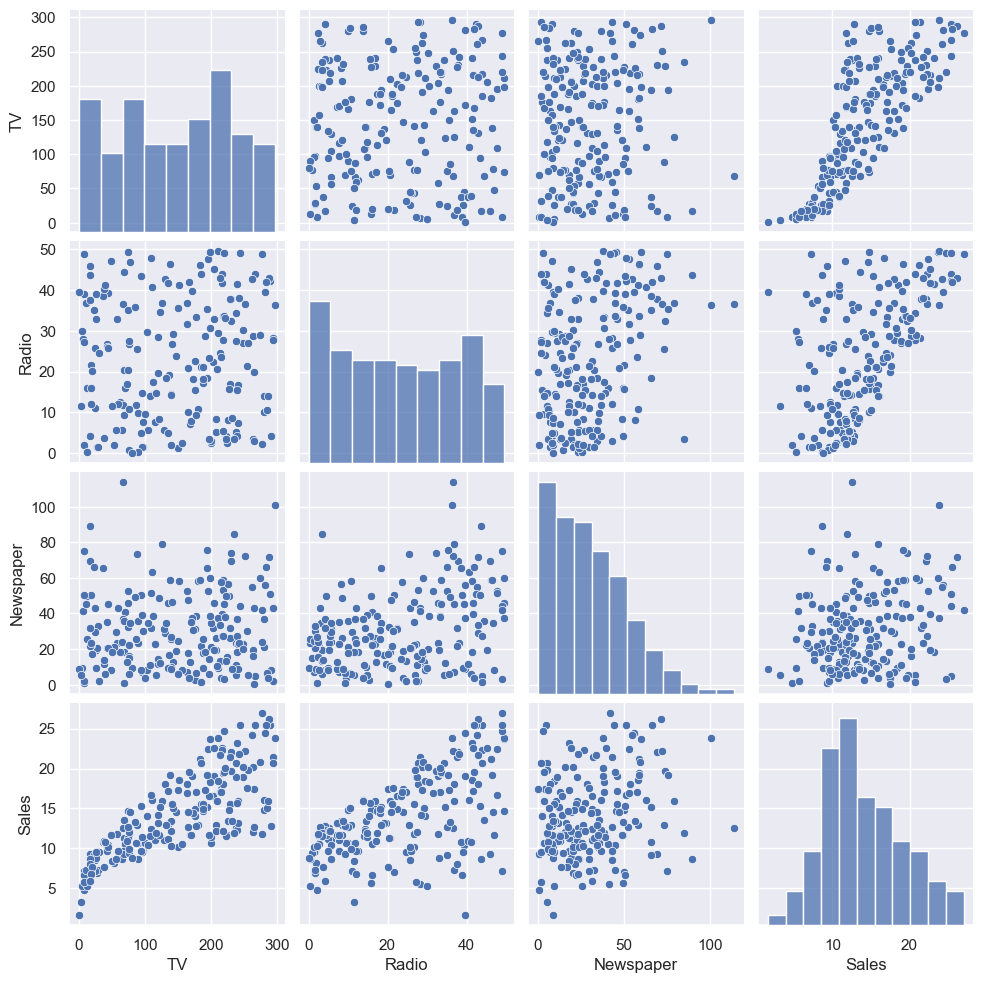

In [13]:
sns.pairplot(df)

array([[<Axes: xlabel='TV', ylabel='TV'>,
        <Axes: xlabel='Radio', ylabel='TV'>,
        <Axes: xlabel='Newspaper', ylabel='TV'>,
        <Axes: xlabel='Sales', ylabel='TV'>],
       [<Axes: xlabel='TV', ylabel='Radio'>,
        <Axes: xlabel='Radio', ylabel='Radio'>,
        <Axes: xlabel='Newspaper', ylabel='Radio'>,
        <Axes: xlabel='Sales', ylabel='Radio'>],
       [<Axes: xlabel='TV', ylabel='Newspaper'>,
        <Axes: xlabel='Radio', ylabel='Newspaper'>,
        <Axes: xlabel='Newspaper', ylabel='Newspaper'>,
        <Axes: xlabel='Sales', ylabel='Newspaper'>],
       [<Axes: xlabel='TV', ylabel='Sales'>,
        <Axes: xlabel='Radio', ylabel='Sales'>,
        <Axes: xlabel='Newspaper', ylabel='Sales'>,
        <Axes: xlabel='Sales', ylabel='Sales'>]], dtype=object)

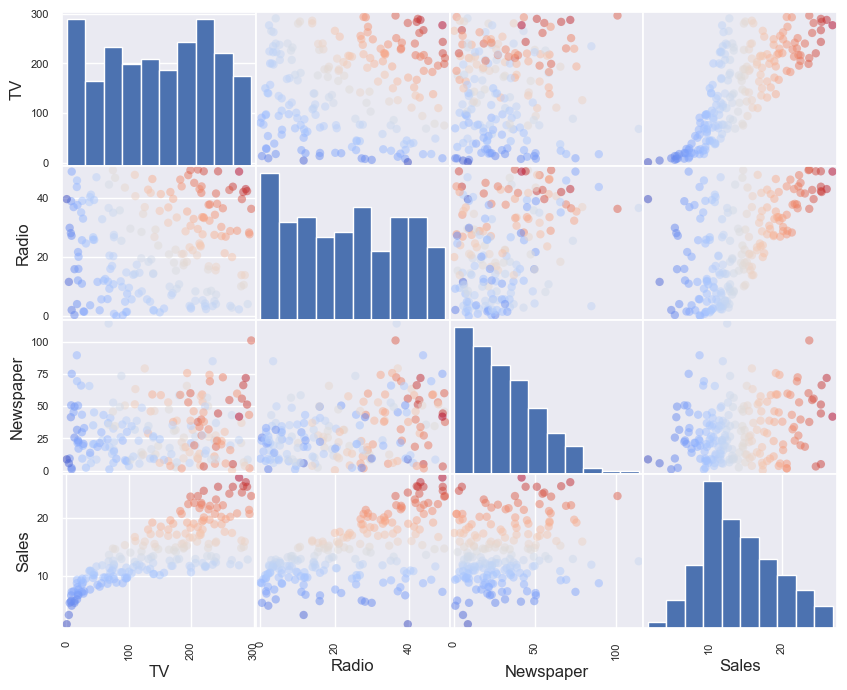

In [19]:
scatter_matrix(df, diagonal = "hist", marker = "o", c = df['Sales'], cmap = 'coolwarm', figsize = (10,8))

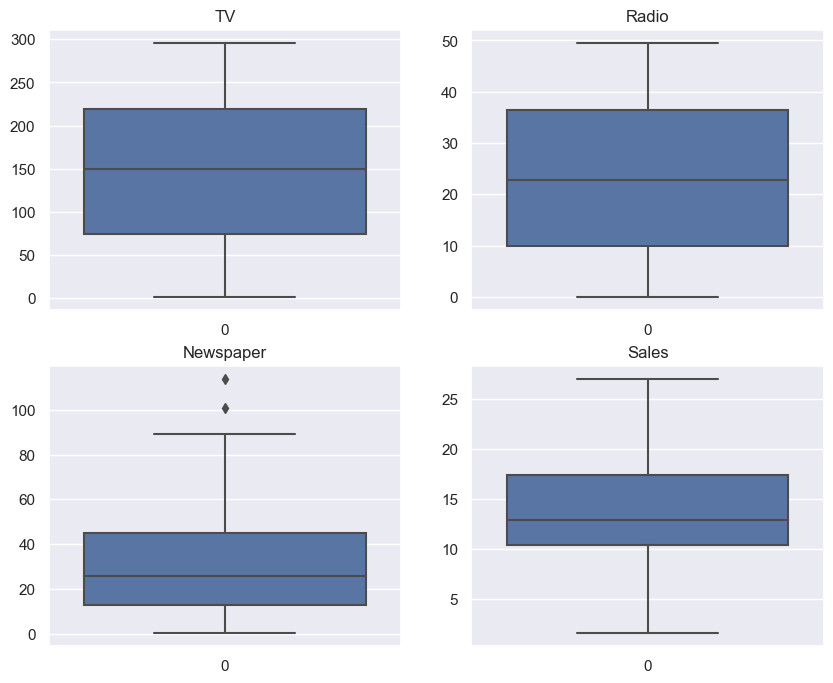

In [26]:
plt.figure(figsize=(10,8))
for col in df.select_dtypes(include="number").columns:
    plt.subplot(2,2,df.columns.get_loc(col)+1);
    sns.boxplot(df[col])
    plt.title(col)

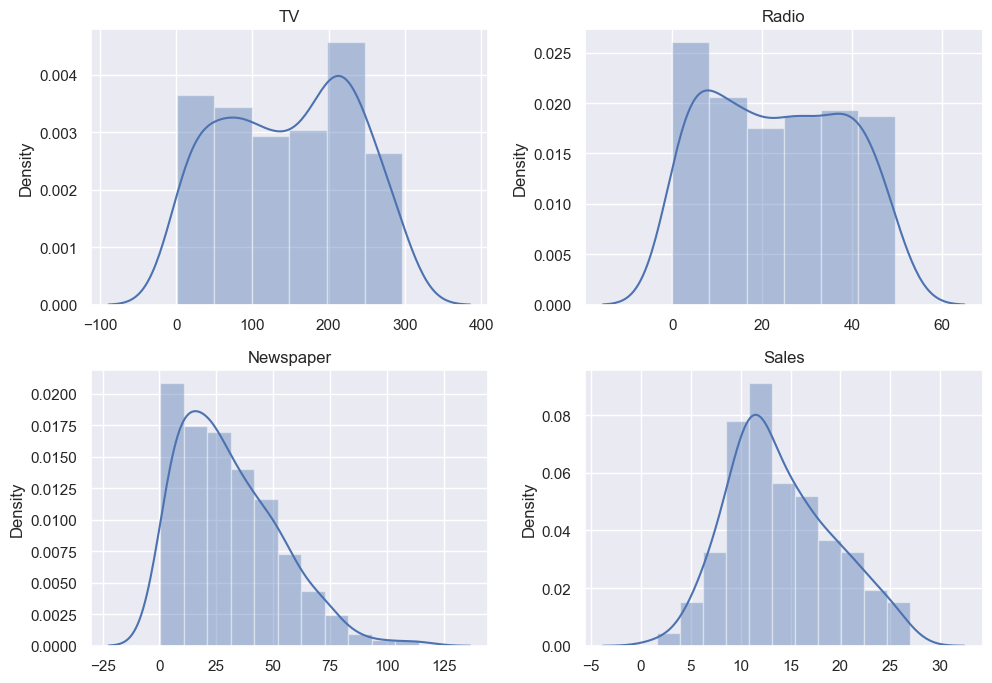

In [30]:

plt.figure(figsize=(10,7))

for col in df.select_dtypes(include = ['number']).columns:
    plt.subplot(2, 2, df.columns.get_loc(col) + 1)  # Adjust the subplot layout as needed
    sns.distplot(x=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

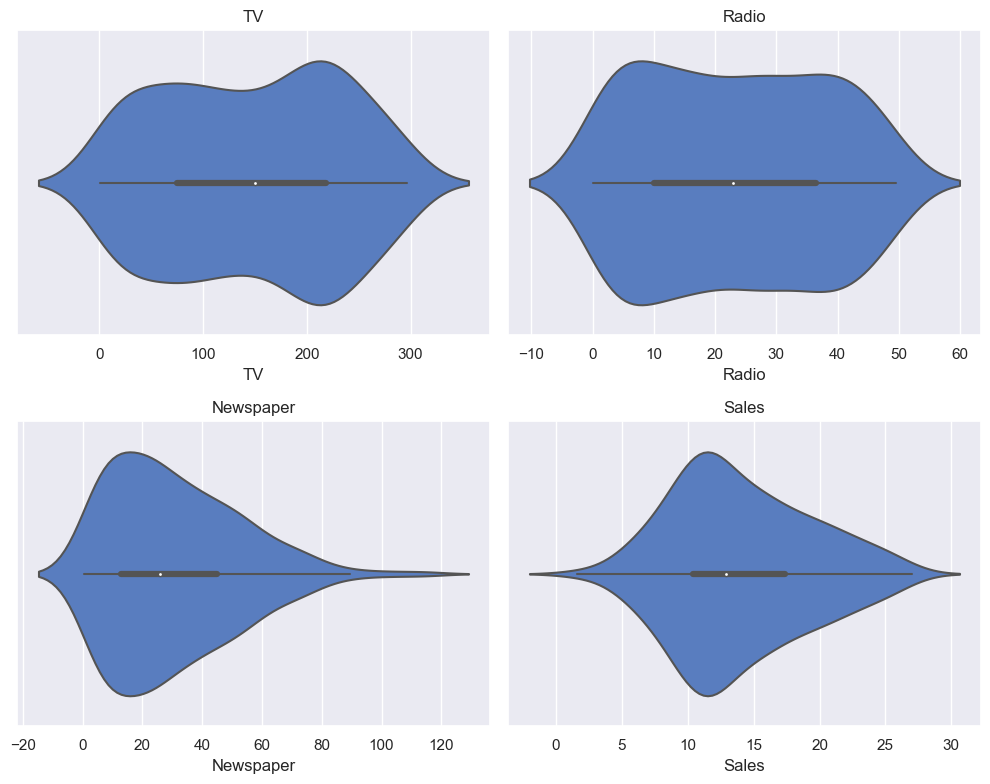

In [32]:
plt.figure(figsize=(10, 8))

for col in df.select_dtypes(include = ['number']).columns:
    plt.subplot(2, 2, df.columns.get_loc(col) + 1)  # Adjust the subplot layout as needed
    sns.violinplot(x=df[col], palette = 'muted')
    plt.title(col)

plt.tight_layout()
plt.show()

<Axes: >

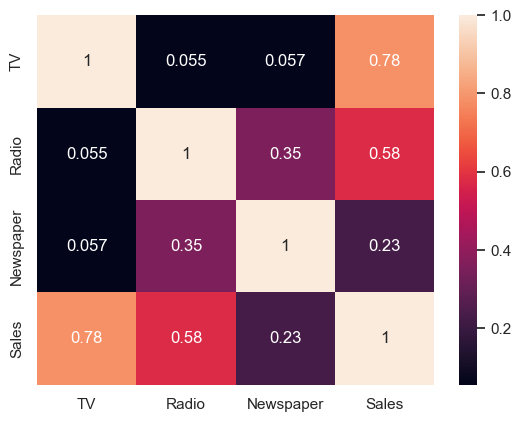

In [35]:
sns.heatmap(df.corr(),annot=True)

In [37]:
df.nlargest(10,"Sales")

,TV,Radio,Newspaper,Sales
175,276.9,48.9,41.8,27.0
183,287.6,43.0,71.8,26.2
198,283.6,42.0,66.2,25.5
36,266.9,43.8,5.0,25.4
98,289.7,42.3,51.2,25.4
147,243.2,49.0,44.3,25.4
128,220.3,49.0,3.2,24.7
17,281.4,39.6,55.8,24.4
61,261.3,42.7,54.7,24.2
58,210.8,49.6,37.7,23.8


In [39]:
X=df.drop("Sales",axis=1)
y=df["Sales"]

In [40]:
from sklearn.model_selection import train_test_split

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 , random_state=12)

In [50]:
lr=LinearRegression()

In [51]:
lr.fit(X_train,y_train)

LinearRegression()

In [53]:
y_pred=lr.predict(X_test)

In [56]:
r_squared=r2_score(y_pred,y_test)
mse=mean_squared_error(y_pred,y_test)

In [61]:
print("linearRegression \n--------------------")
print(f"r_squared:{r_squared}")
print(f"mse:{mse}")

linearRegression 
--------------------
r_squared:0.9056322191902992
mse:2.5610276048471907


In [66]:
ls=Lasso()

In [67]:
ls.fit(X_train,y_train)

Lasso()

In [69]:
y_pred=ls.predict(X_test)

In [70]:
r_squared=r2_score(y_pred,y_test)
mse=mean_squared_error(y_pred,y_test)

In [71]:
print("Lasso \n--------------------")
print(f"r_squared:{r_squared}")
print(f"mse:{mse}")

Lasso 
--------------------
r_squared:0.9059246270875434
mse:2.518493492562732


In [73]:
rg=Ridge()

In [74]:
rg.fit(X_train,y_train)

Ridge()

In [76]:
y_pred=rg.predict(X_test)

In [77]:
r_squared=r2_score(y_pred,y_test)
mse=mean_squared_error(y_pred,y_test)

In [78]:
print("Ridge \n--------------------")
print(f"r_squared:{r_squared}")
print(f"mse:{mse}")

Ridge 
--------------------
r_squared:0.9056323455852876
mse:2.560971312256775


In [79]:
dt=DecisionTreeRegressor()

In [80]:
dt.fit(X_train,y_train)

DecisionTreeRegressor()

In [83]:
y_pred=dt.predict(X_test)

In [84]:
r_squared=r2_score(y_pred,y_test)
mse=mean_squared_error(y_pred,y_test)

In [85]:
print("Decission Tree classifier \n--------------------")
print(f"r_squared:{r_squared}")
print(f"mse:{mse}")

Decission Tree classifier 
--------------------
r_squared:0.9510482985469568
mse:1.461666666666667


In [86]:
rfr=RandomForestRegressor()

In [87]:
rfr.fit(X_train,y_train)

RandomForestRegressor()

In [89]:
y_pred=rfr.predict(X_test)

In [91]:
r_squared=r2_score(y_pred,y_test)
mse=mean_squared_error(y_pred,y_test)

In [93]:
print("RandomForestRegressor \n--------------------")
print(f"r_squared:{r_squared}")
print(f"mse:{mse}")

RandomForestRegressor 
--------------------
r_squared:0.9779210853438353
mse:0.5938572333333322


In [94]:
gbr=GradientBoostingRegressor()

In [95]:
gbr.fit(X_train,y_train)

GradientBoostingRegressor()

In [96]:
y_pred=gbr.predict(X_test)

In [97]:
r_squared=r2_score(y_pred,y_test)
mse=mean_squared_error(y_pred,y_test)

In [98]:
print(" GradientBoostingRegressor\n--------------------")
print(f"r_squared:{r_squared}")
print(f"mse:{mse}")

 GradientBoostingRegressor
--------------------
r_squared:0.9799006784015362
mse:0.542243958791639


In [102]:
 knr=KNeighborsRegressor()

In [103]:
knr.fit(X_train,y_train)

KNeighborsRegressor()

In [105]:
y_pred=knr.predict(X_test)

In [106]:
r_squared=r2_score(y_pred,y_test)
mse=mean_squared_error(y_pred,y_test)

In [107]:
print("KNeighborsRegressor\n--------------------")
print(f"r_squared:{r_squared}")
print(f"mse:{mse}")

KNeighborsRegressor
--------------------
r_squared:0.9421628540034646
mse:1.5132800000000004


### best model is GradientBoostingRegressor 

In [108]:
gbr=GradientBoostingRegressor()

In [109]:
gbr.fit(X_train,y_train)

GradientBoostingRegressor()

In [110]:
y_pred=gbr.predict(X_test)

In [111]:
r_squared=r2_score(y_pred,y_test)
mse=mean_squared_error(y_pred,y_test)

In [112]:
print(" GradientBoostingRegressor\n--------------------")
print(f"r_squared:{r_squared}")
print(f"mse:{mse}")

 GradientBoostingRegressor
--------------------
r_squared:0.9797709030402677
mse:0.5497732451992619


In [114]:
result=pd.DataFrame({"actual_value":y_test,"predicted_value":y_pred})

In [115]:
result.head()

,actual_value,predicted_value
23,15.5,15.392320
182,8.7,8.944926
172,7.6,7.132632
21,12.5,12.017607
63,14.0,12.239789


In [116]:
pickle.dump(gbr, open('model.pkl','wb'))